In [1]:
%matplotlib inline
import cPickle
import matplotlib.pyplot as plt
import numpy as np
import os

In [11]:
BASE_PATH = r"..\..\scripts_client\reconstruction\2017_04_20_08_0_00"
with open(os.path.join(BASE_PATH, "export_data.pkl"), "rb") as f:
    data = cPickle.load(f)

In [12]:
print("Cameras: {}".format(data.keys()))
print("Data: {}".format(data.values()[0].keys()))

Cameras: ['109L', '110']
Data: ['PHI', 'PSI', 'G', 'MASK', 'Visibility', 'B', 'SUN_MASK', 'R', 'extra_data']


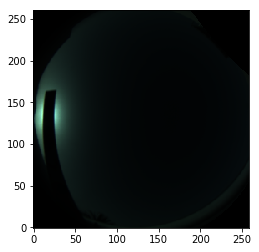

In [13]:
cam = data["110"]
img = np.dstack((cam["R"], cam["G"], cam["B"]))
plt.imshow(img/img.max(), origin="bottom")

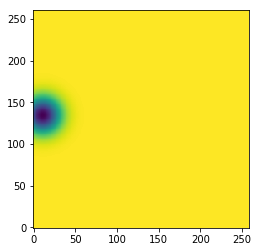

In [14]:
plt.imshow(cam["SUN_MASK"], origin="bottom")

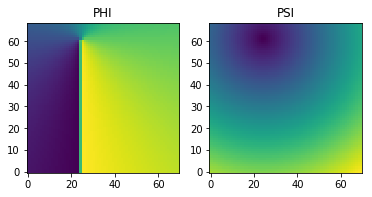

In [6]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(cam["PHI"], origin="bottom")
axes[0].set_title("PHI")
axes[1].imshow(cam["PSI"], origin="bottom")
axes[1].set_title("PSI")

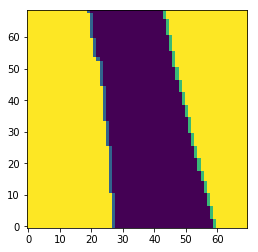

In [5]:
plt.imshow(cam["MASK"], origin="bottom")

In [56]:
cam.keys()

['PHI', 'PSI', 'G', 'MASK', 'Visibility', 'B', 'R', 'extra_data']

In [57]:
cam["extra_data"]

{'at_time': datetime.datetime(2017, 3, 5, 14, 5, 0, 191),
 'bounding_phi': array([-2.5015045 , -1.86018286, -2.84481372, -1.57445174]),
 'bounding_psi': array([ 1.52905649,  1.48245919,  0.84391975,  0.75286081]),
 'sun_az': 1.2192324082083026,
 'sun_mu': -0.31966211866635047,
 'x': 1495.0520946545503,
 'y': 1462.4543622404212,
 'z': -211.34338273814558}

In [58]:
cam["PHI"].min(), cam["PHI"].max()

(0.016146926724390685, 5.4871993612701422)

In [59]:
cam["PSI"].min(), cam["PSI"].max()

(-2.5015649482531916, -1.6130988793461349)

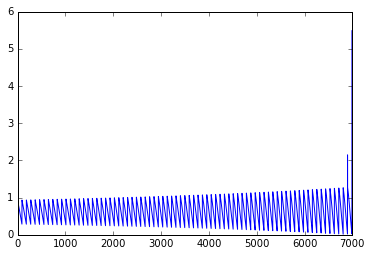

In [60]:
plt.plot(cam["PHI"].flatten())

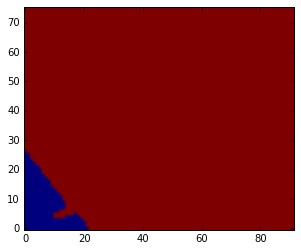

In [61]:
from CameraNetwork.export import calcSunshaderMask
plt.imshow(calcSunshaderMask(img, grabcut_threshold=30.), origin="bottom")

In [50]:
img.min()

10.149114324060502